# Ensemble(Boosting and Stacking)

A machine learning ensemble is a method of finding the optimal answer using multiple machine learning models.

- Learning data using multiple models and averaging the prediction results of all models

**Types of ensemble techniques**
- Voting: draw results through voting
- Bagging: Deriving results by creating duplicate samples
- Boosting: weighting while compensating for previous errors
- Stacking: The meta model is predicted once again through the predicted results based on multiple models.

**References**

* [Voting](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [Bagging](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [Boosting](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image

np.set_printoptions(suppress=True)

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [10]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [11]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
287,0.03871,52.5,5.32,0.0,0.405,6.209,31.3,7.3172,6.0,293.0,16.6,396.90,7.14
29,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63
389,8.15174,0.0,18.10,0.0,0.700,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85


In [12]:
y_train.head()

287    23.2
29     21.0
84     23.9
102    18.6
389    11.5
Name: MEDV, dtype: float64

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

## single regression prediction model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

### Boosting

It is a method that learns weak learners sequentially, but compensates for errors by adding weights to data that were incorrectly predicted for previous learning.

**Advantages**
- Very good performance (Lgbm, XGBoost)

**disadvantage**
- Due to the nature of the boosting algorithm, it continuously tries to compensate for weaknesses (misclassification/residual), so it may be more sensitive than necessary to incorrect labeling or outliers.
- Compared to other ensembles, there is a disadvantage that it takes a long time to learn **

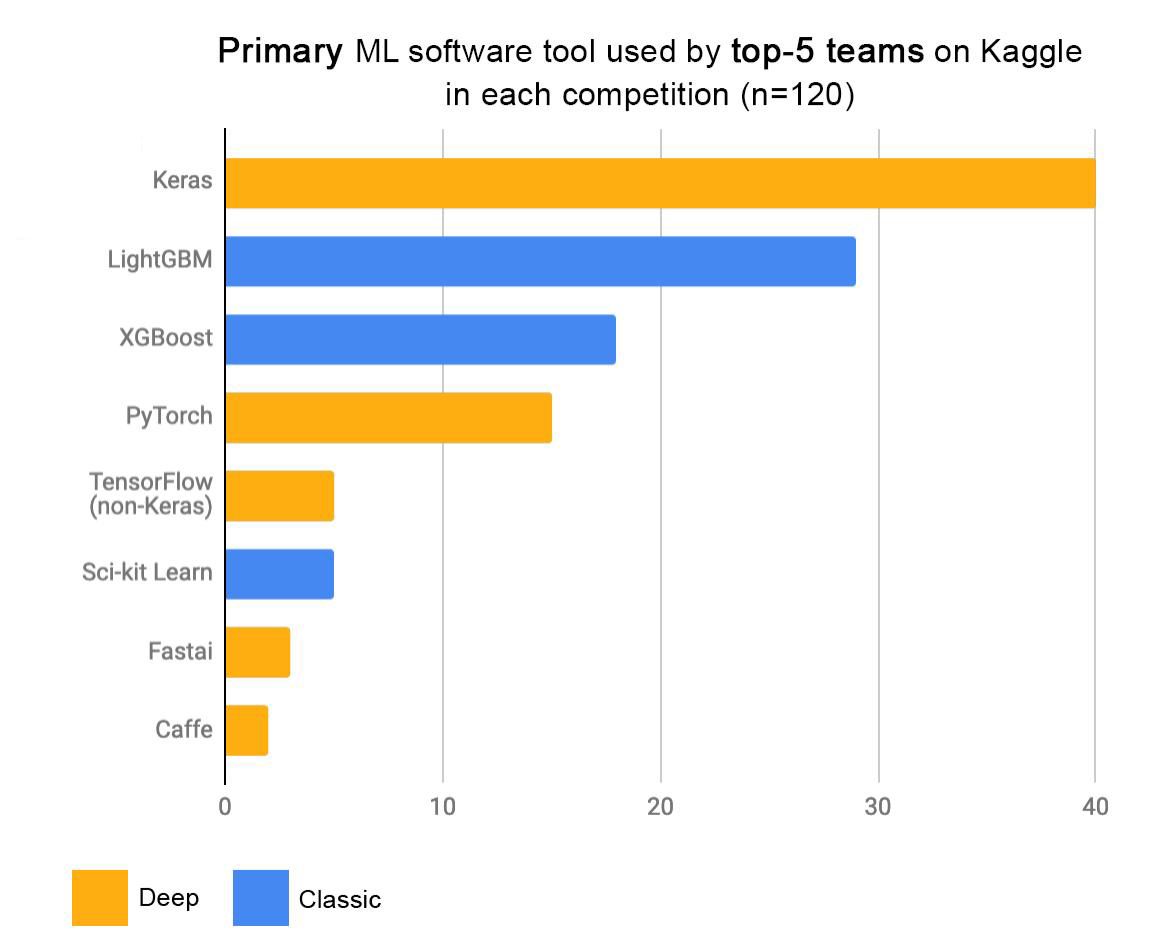

In [16]:
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=800)

**Representative Boosting Ensemble**
1. AdaBoost
2. GradientBoost
3. LightGBM (LGBM)
4. XGBoost

### GradientBoost

- Excellent performance
- Learning time is too slow

In [17]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

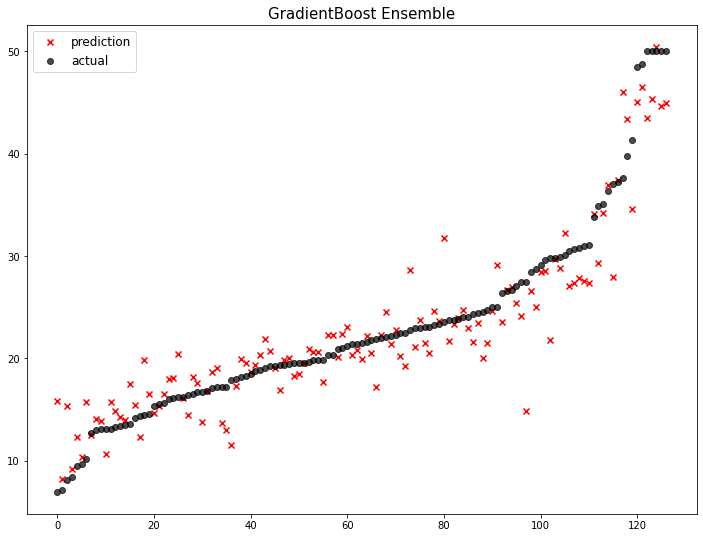

                    model        mse
0  GradientBoost Ensemble  10.586423


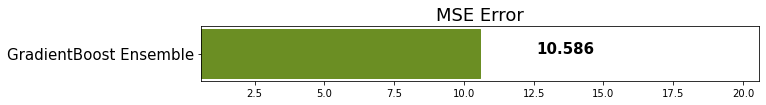

In [18]:
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', gbr_pred, y_test)

**Hyperparameter**
- random_state: random seed fixed value. Stay tuned and tune in
- n_jobs: number of CPU usage
- learning_rate: learning rate. A learning rate that is too large degrades performance, and a learning rate that is too small slows learning. You need to find an appropriate value. Tuning with n_estimators. default=0.1
- n_estimators: number of boosting stages. (Similar concept to setting the number of random forest trees). default=100
- subsample: percentage of sample usage (similar concept to max_features). To prevent overfitting
- min_samples_split: The minimum number of samples when splitting a node. default=2. To prevent overfitting

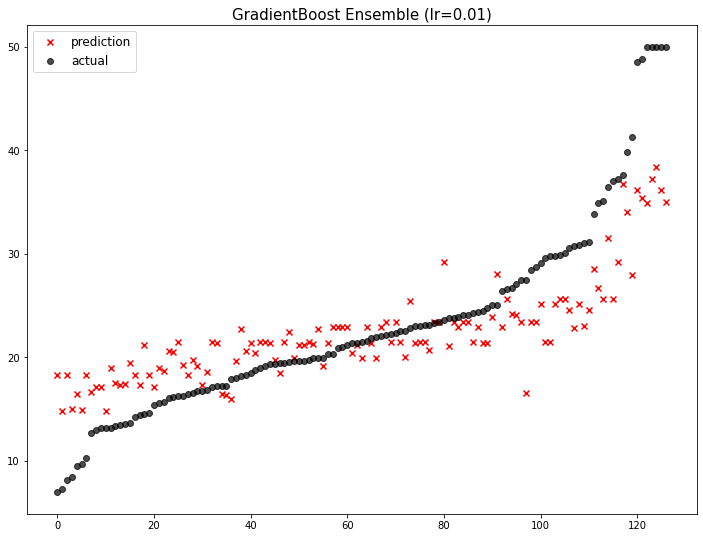

                              model        mse
0  GradientBoost Ensemble (lr=0.01)  28.894598
1            GradientBoost Ensemble  10.586423


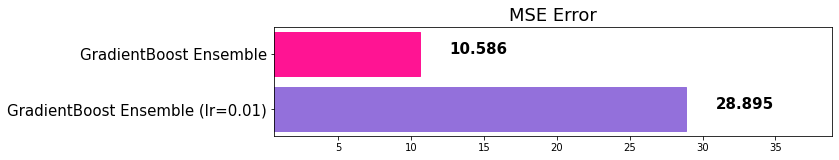

In [19]:
gbr = GradientBoostingRegressor(random_state = 42, learning_rate = 0.01)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01)', gbr_pred, y_test)

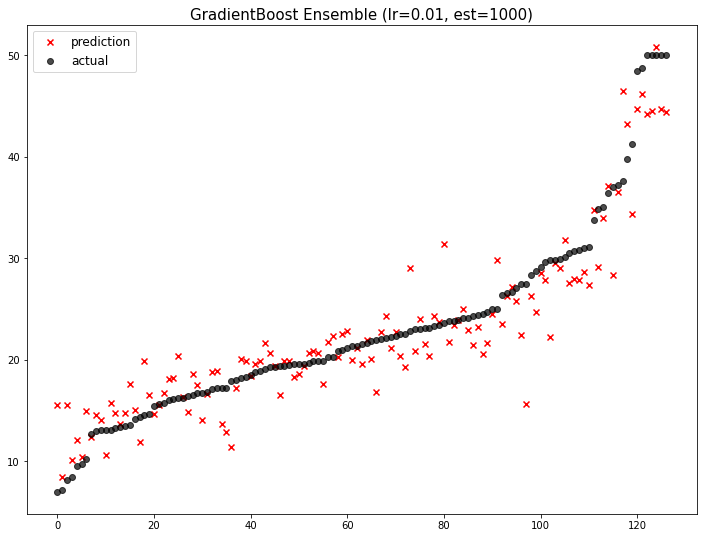

                                        model        mse
0            GradientBoost Ensemble (lr=0.01)  28.894598
1  GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
2                      GradientBoost Ensemble  10.586423


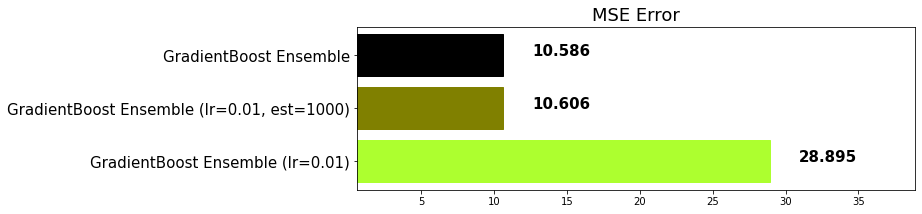

In [20]:
gbr = GradientBoostingRegressor(random_state = 42, learning_rate = 0.01, n_estimators = 1000)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01, est=1000)', gbr_pred, y_test)

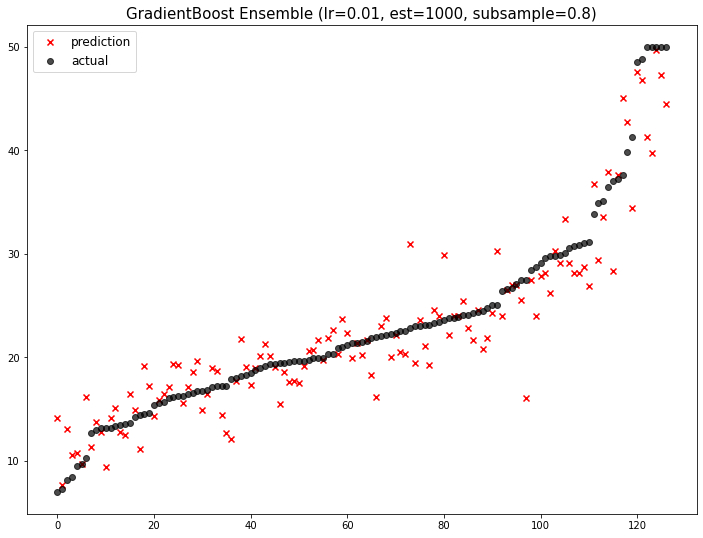

                                               model        mse
0                   GradientBoost Ensemble (lr=0.01)  28.894598
1         GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
2                             GradientBoost Ensemble  10.586423
3  GradientBoost Ensemble (lr=0.01, est=1000, sub...  10.411742


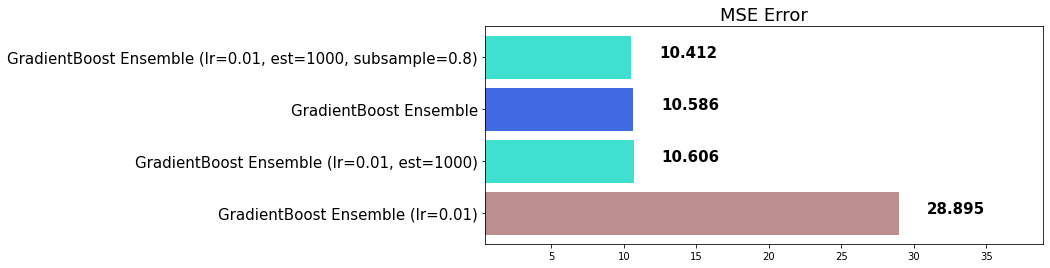

In [21]:
gbr = GradientBoostingRegressor(random_state = 42, learning_rate = 0.1, n_estimators = 1000, subsample = 0.8)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01, est=1000, subsample=0.8)', gbr_pred, y_test)

### XGBoost
e**X**treme **G**radient **B**oosting

[document](https://xgboost.readthedocs.io/en/latest/)

**KEY FEATURES**
- Not a scikit-learn package.
- Excellent performance
- Faster and better performance than GBM.
- Learning time is still very slow

In [22]:
from xgboost import XGBRegressor, XGBClassifier

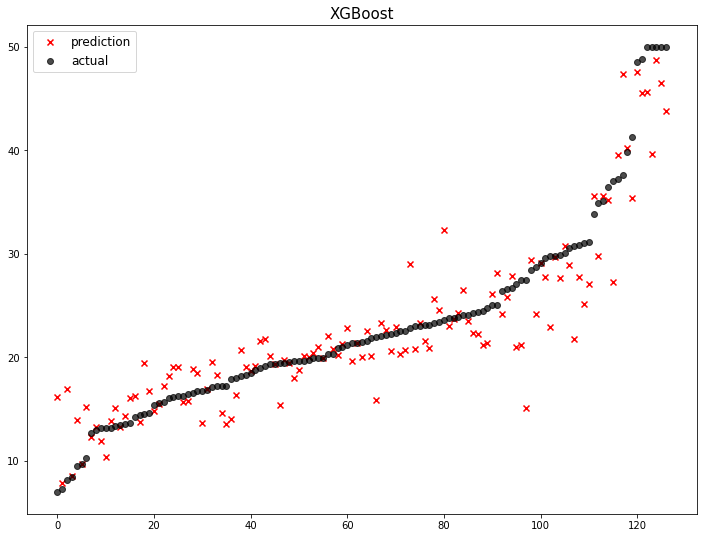

                                               model        mse
0                   GradientBoost Ensemble (lr=0.01)  28.894598
1                                            XGBoost  12.163279
2         GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
3                             GradientBoost Ensemble  10.586423
4  GradientBoost Ensemble (lr=0.01, est=1000, sub...  10.411742


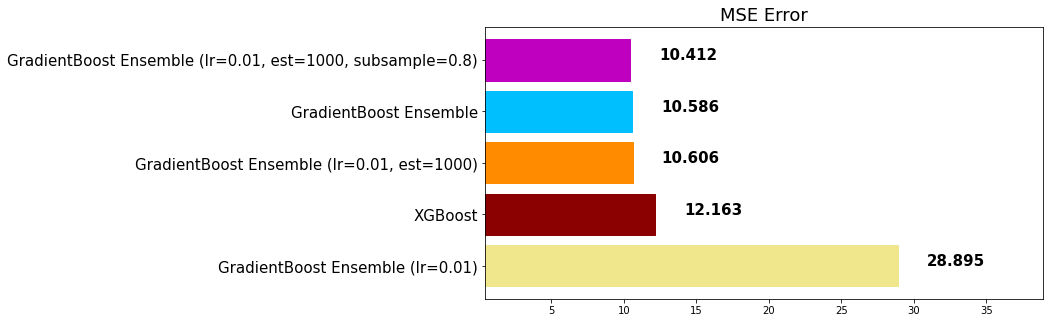

In [23]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', xgb_pred, y_test)

**Hyperparameter**
- random_state: random seed fixed value. Stay tuned and tune in
- n_jobs: number of CPU usage
- learning_rate: learning rate. A learning rate that is too large degrades performance, and a learning rate that is too small slows learning. You need to find an appropriate value. Tuning with n_estimators. default=0.1
- n_estimators: number of boosting stages. (Similar concept to setting the number of random forest trees). default=100
- max_depth: the depth of the tree. To prevent overfitting. default=3.
- subsample: percentage of sample used. To prevent overfitting. default=1.0
- max_features: The percentage of features to use as the maximum. To prevent overfitting. default=1.0

[22:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




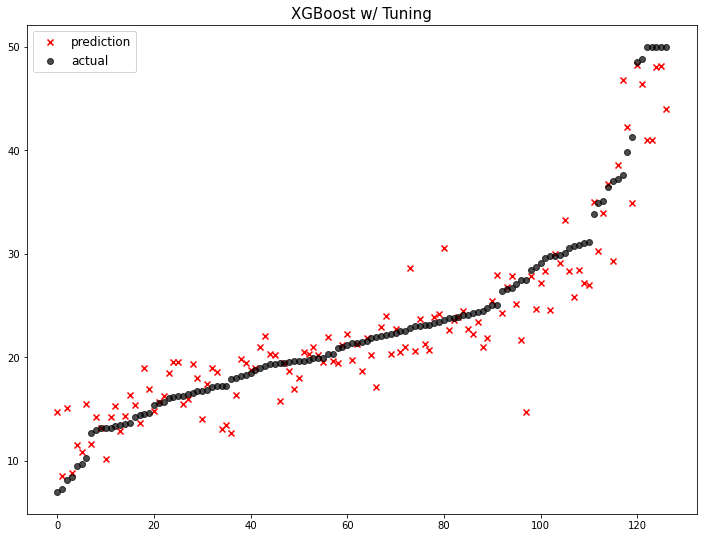

                                               model        mse
0                   GradientBoost Ensemble (lr=0.01)  28.894598
1                                            XGBoost  12.163279
2         GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
3                             GradientBoost Ensemble  10.586423
4  GradientBoost Ensemble (lr=0.01, est=1000, sub...  10.411742
5                                  XGBoost w/ Tuning  10.325862


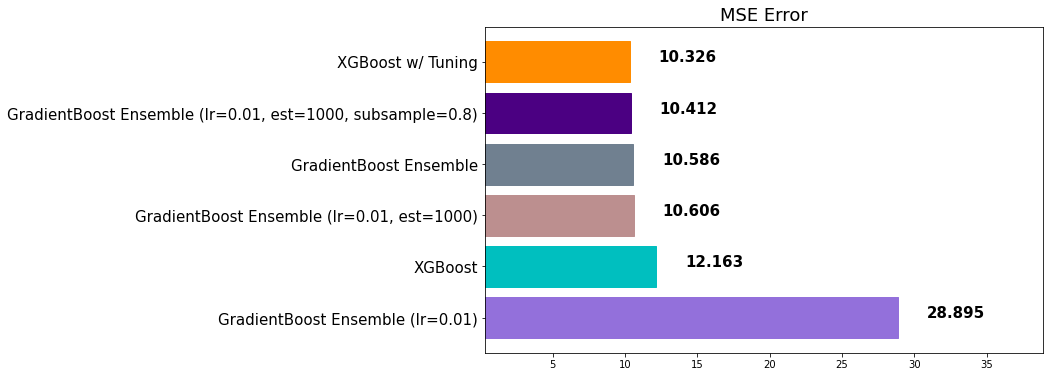

In [24]:
xgb = XGBRegressor(random_state = 42, learning_rate = 0.01, n_estimators = 1000, subsample = 0.8, max_features = 0.8, max_depth = 7)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost w/ Tuning', xgb_pred, y_test)

### LightGBM

[document](https://lightgbm.readthedocs.io/en/latest/)

**KEY FEATURES**
- Not a scikit-learn package.
- Excellent performance
- The speed is also very fast.

In [25]:
from lightgbm import LGBMRegressor, LGBMClassifier

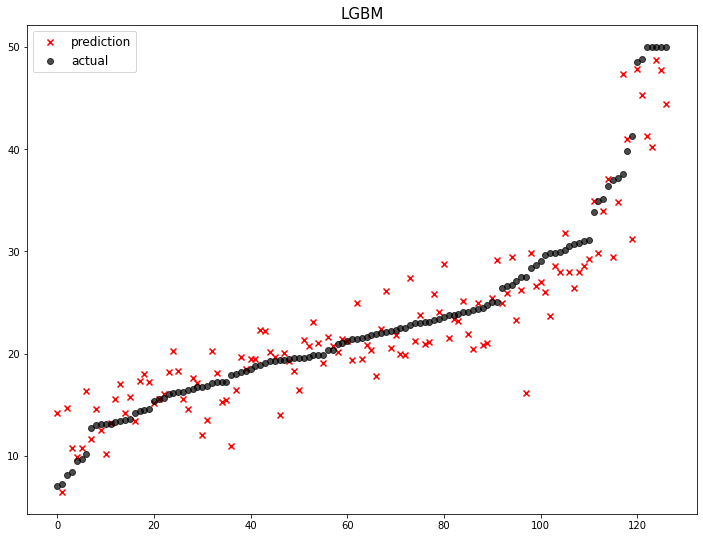

                                               model        mse
0                   GradientBoost Ensemble (lr=0.01)  28.894598
1                                            XGBoost  12.163279
2                                               LGBM  11.110939
3         GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
4                             GradientBoost Ensemble  10.586423
5  GradientBoost Ensemble (lr=0.01, est=1000, sub...  10.411742
6                                  XGBoost w/ Tuning  10.325862


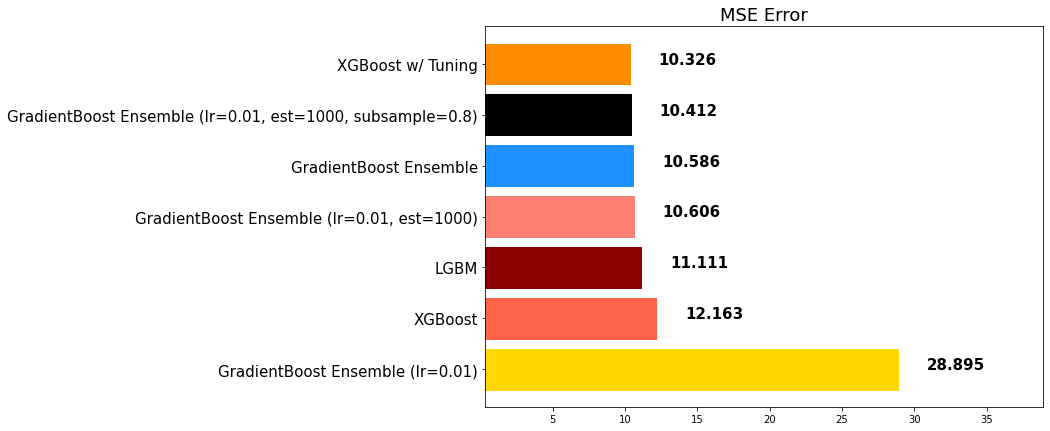

In [26]:
lgbm = LGBMRegressor(random_state = 42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

**Hyperparameter**
- random_state: random seed fixed value. Stay tuned and tune in
- n_jobs: number of CPU usage
- learning_rate: learning rate. A learning rate that is too large degrades performance, and a learning rate that is too small slows learning. You need to find an appropriate value. Tuning with n_estimators. default=0.1
- n_estimators: number of boosting stages. (Similar concept to setting the number of random forest trees). default=100
- max_depth: the depth of the tree. To prevent overfitting. default=3.
- colsample_bytree: percentage of samples used (similar concept to max_features). To prevent overfitting. default=1.0

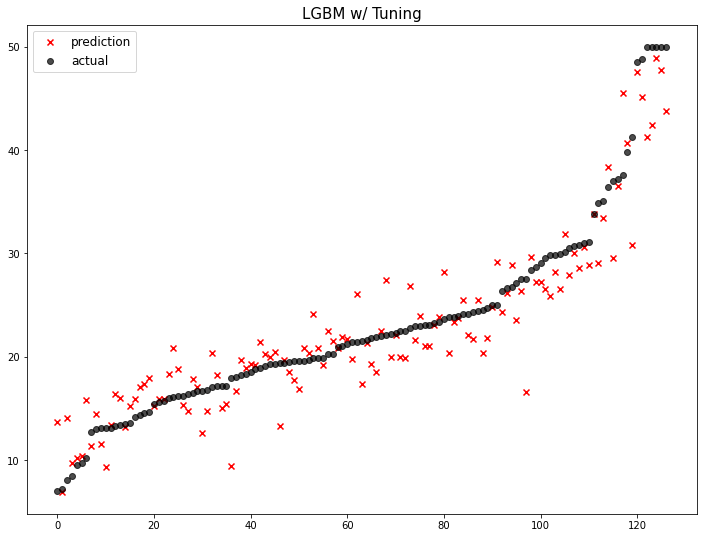

                                               model        mse
0                   GradientBoost Ensemble (lr=0.01)  28.894598
1                                            XGBoost  12.163279
2                                               LGBM  11.110939
3         GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
4                             GradientBoost Ensemble  10.586423
5                                     LGBM w/ Tuning  10.467642
6  GradientBoost Ensemble (lr=0.01, est=1000, sub...  10.411742
7                                  XGBoost w/ Tuning  10.325862


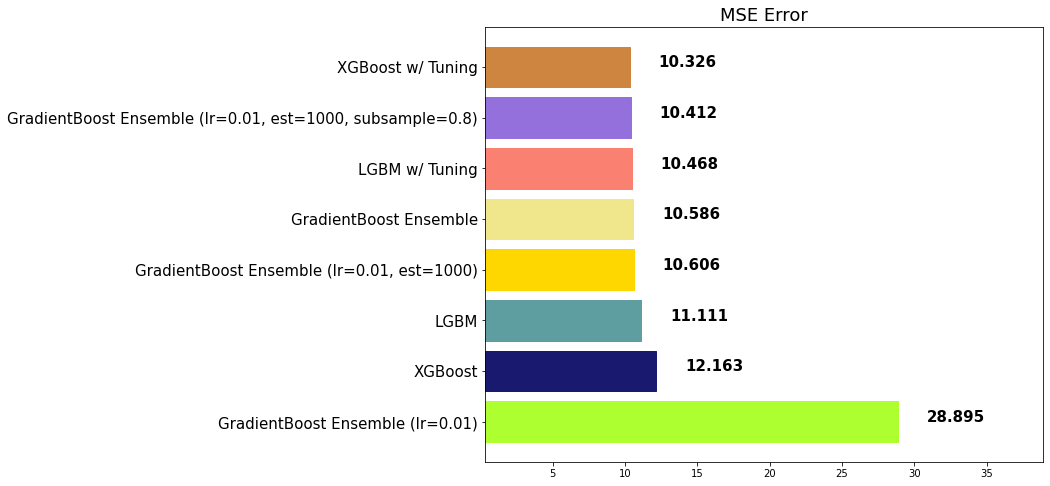

In [27]:
lgbm = LGBMRegressor(random_state = 42, learning_rate = 0.01, n_estimators = 2000, colsample_bytree = 0.8, subsample = 0.8, max_depth = 7)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM w/ Tuning', lgbm_pred, y_test)

### Stacking

Based on the data predicted by individual models, the **final_estimator** aggregates to make predictions.

- It is also used to increase performance to the extreme.
- May cause overfitting. (especially when the dataset is small)

[document](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)

In [28]:
from sklearn.ensemble import StackingRegressor

In [29]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree = 2, include_bias = False),
    StandardScaler(),
    ElasticNet(alpha = 0.1, l1_ratio = 0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

C:\Users\boyka\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.04577034800968, tolerance: 3.1468424538258573
  model = cd_fast.enet_coordinate_descent(


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfr = RandomForestRegressor(random_state = 42, n_estimators = 1000, max_depth = 7, max_features = 0.8)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

In [32]:
stack_models = [
    ('elasticnet', poly_pipeline),
    ('randomforest', rfr),
    ('gbr', gbr),
    ('labm', lgbm)
]

In [33]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs = -1)

[22:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




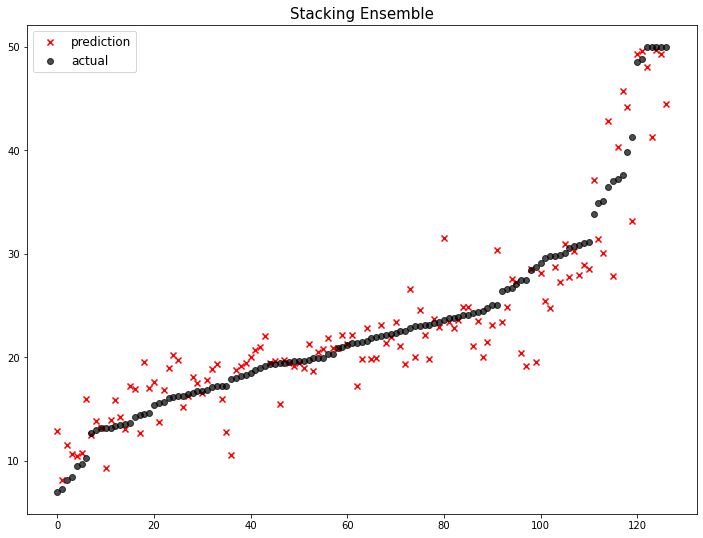

                                               model        mse
0                   GradientBoost Ensemble (lr=0.01)  28.894598
1                                            XGBoost  12.163279
2                                               LGBM  11.110939
3         GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
4                             GradientBoost Ensemble  10.586423
5                                     LGBM w/ Tuning  10.467642
6  GradientBoost Ensemble (lr=0.01, est=1000, sub...  10.411742
7                                  Stacking Ensemble  10.335870
8                                  XGBoost w/ Tuning  10.325862


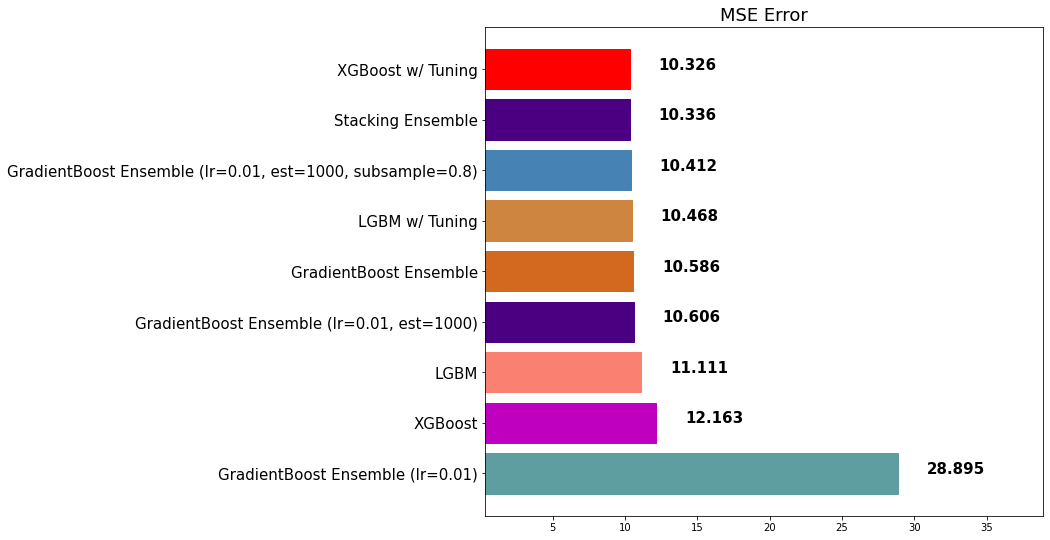

In [34]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

## Cross Validation

- Cross validation is one way to evaluate a model.
- K-fold Cross Validation is widely used.

**K-fold cross-validation**
- K-fold cross-validation ensures that all data is used as a test set at least once. If you look at the figure below, you can see that the data is divided into 5 and the test set is changed each time.

[example]
- When Estimation 1,

Training data: [B, C, D, E] / Verification data: [A]

- When Estimation 2,

Training data: [A, C, D, E] / Verification data: [B]

**K-Fold Cross Validation Set 만들기**

In [35]:
from sklearn.model_selection import KFold

In [36]:
n_splits = 5
kfold = KFold(n_splits = n_splits, random_state = 42, shuffle=True)

In [37]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
X = np.array(df.drop('MEDV', 1))
Y = np.array(df['MEDV'])

In [39]:
lgbm_fold = LGBMRegressor(random_state=42)

In [40]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_test_fold)
    error = mean_squared_error(lgbm_pred_fold, y_test_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

Fold = 1, prediction score = 8.34
Fold = 2, prediction score = 10.40
Fold = 3, prediction score = 17.58
Fold = 4, prediction score = 6.94
Fold = 5, prediction score = 12.16
------------------------------
Average Error: 11.083201392666322


## Hyperparameter tuning

1. **RandomizedSearchCV**
2. **GridSearchCV**

**How to Apply**

1. Select the search method you want to use.
2. Set the hyperparameter domain. (`max_depth`, `n_estimators`..etc)
3. After learning, wait.
4. Apply the derived values to the model and compare the performance.

## RandomizedSearchCV

- A fixed number of parameter settings are sampled from a given distribution rather than all parameter values being tried.
- The number of parameter settings attempted is given by `n_iter`.

**Hyperparameter (LGBM)**
- random_state: random seed fixed value. Stay tuned and tune in!
- n_jobs: number of CPU usage
- learning_rate: learning rate. A learning rate that is too large degrades performance, and a learning rate that is too small slows learning. You need to find an appropriate value. Tuning with n_estimators. default=0.1
- n_estimators: number of boosting stages. (Similar concept to setting the number of random forest trees). default=100
- max_depth: the depth of the tree. To prevent overfitting. default=3.
- colsample_bytree: percentage of samples used (similar concept to max_features). To prevent overfitting. default=1.0

In [41]:
params = {
    'n_estimators' : [200, 500, 1000, 2000],
    'learning_rate' : [0.1, 0.05, 0.01],
    'max_depth' : [6, 7, 8],
    'colsample_bytree' : [0.8, 0.9, 1.0],
    'subsample' : [0.8, 0.9, 1.0],
}

In [42]:
from sklearn.model_selection import RandomizedSearchCV

Adjust the `n_iter` value to define how many attempts will be made in total.

(As the number of times increases, the probability of finding a better parameter increases, but it takes a long time.)

In [43]:
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state = 42, cv = 3, n_iter = 25, scoring = 'neg_mean_squared_error')

In [44]:
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [45]:
clf.best_score_

-13.817488285782874

In [46]:
clf.best_params_

{'subsample': 0.9,
 'n_estimators': 2000,
 'max_depth': 6,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8}

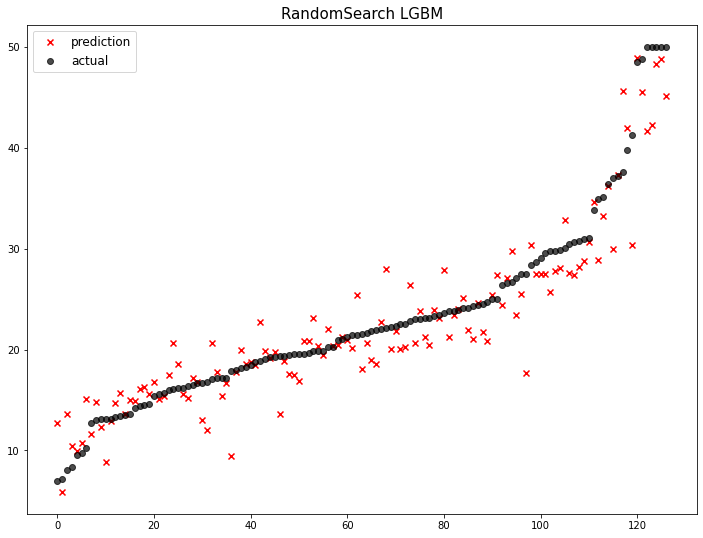

                                               model        mse
0                   GradientBoost Ensemble (lr=0.01)  28.894598
1                                            XGBoost  12.163279
2                                               LGBM  11.110939
3         GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
4                             GradientBoost Ensemble  10.586423
5                                     LGBM w/ Tuning  10.467642
6  GradientBoost Ensemble (lr=0.01, est=1000, sub...  10.411742
7                                  Stacking Ensemble  10.335870
8                                  XGBoost w/ Tuning  10.325862
9                                  RandomSearch LGBM   9.662407


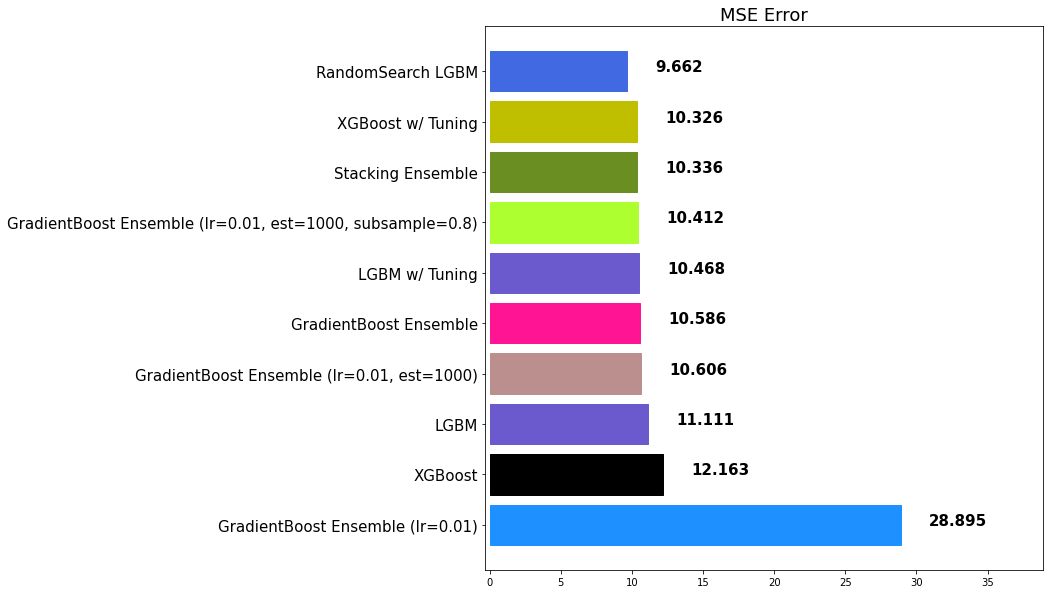

In [47]:
lgbm_best = LGBMRegressor(n_estimators=2000, subsample=0.8, max_depth=7, learning_rate=0.05, colsample_bytree = 1.0)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('RandomSearch LGBM', lgbm_best_pred, y_test)

## GridSearchCV

- Attempts **full search** for all parameter values.
- So, if there are many parameters to optimize, it will take a very long time.

In [48]:
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
}

In [49]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv =3, n_jobs = -1, scoring = 'neg_mean_squared_error')

In [52]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [53]:
grid_search.best_score_

-14.148137385642455

In [54]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 1000,
 'subsample': 0.8}

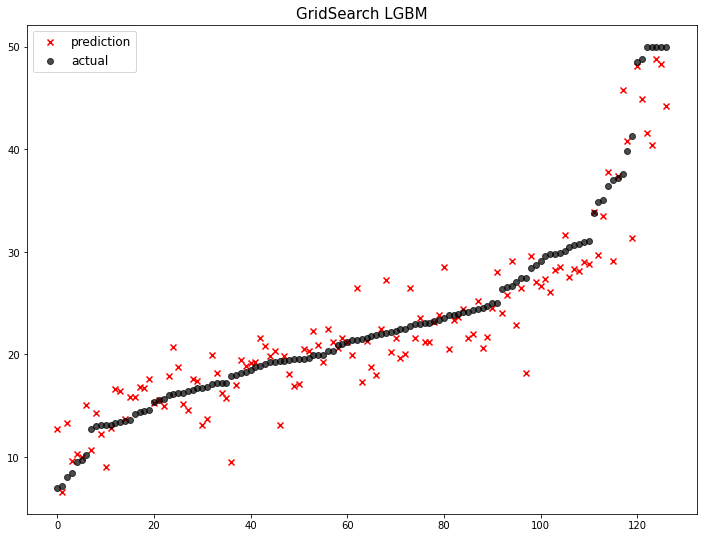

                                                model        mse
0                    GradientBoost Ensemble (lr=0.01)  28.894598
1                                             XGBoost  12.163279
2                                                LGBM  11.110939
3          GradientBoost Ensemble (lr=0.01, est=1000)  10.606463
4                              GradientBoost Ensemble  10.586423
5                                      LGBM w/ Tuning  10.467642
6   GradientBoost Ensemble (lr=0.01, est=1000, sub...  10.411742
7                                   Stacking Ensemble  10.335870
8                                   XGBoost w/ Tuning  10.325862
9                                     GridSearch LGBM   9.969624
10                                  RandomSearch LGBM   9.662407


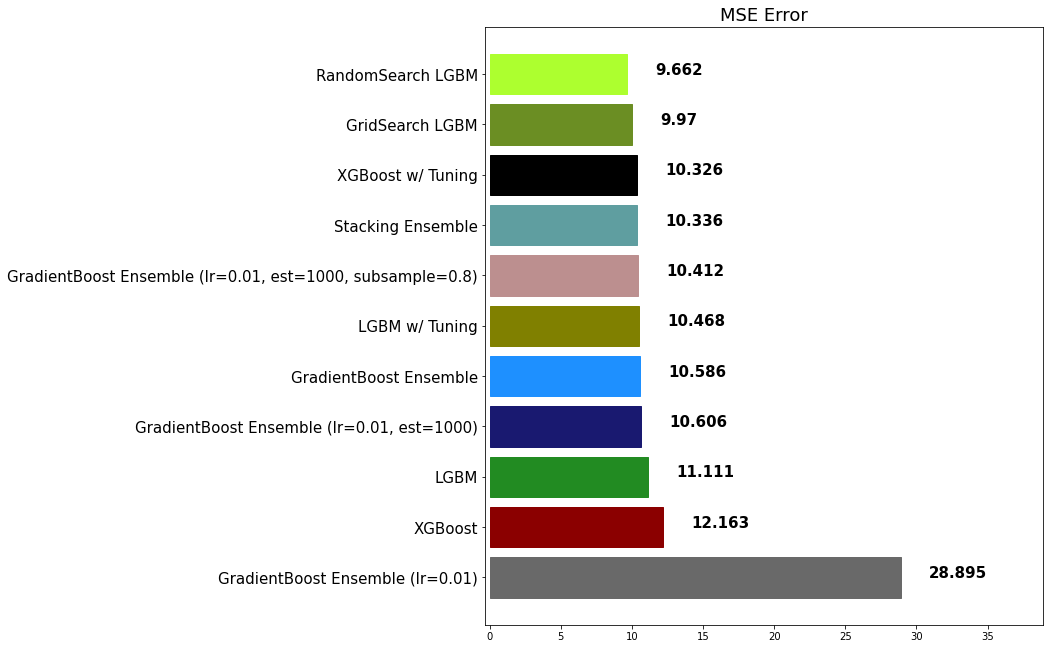

In [55]:
lgbm_best = LGBMRegressor(n_estimators=500, subsample=0.8, max_depth=7, learning_rate=0.05, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', lgbm_best_pred, y_test)